### EDA 2023


In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spark = SparkSession.builder.appName('2023EDA').getOrCreate()

#change configuration settings on Spark 
conf = spark.sparkContext._conf.setAll([('spark.executor.memory', '4g'), ('spark.app.name', 'Spark Updated Conf'), ('spark.executor.cores', '4'), ('spark.cores.max', '4'), ('spark.driver.memory','4g')])

#print spark configuration settings
spark.sparkContext.getConf().getAll()

[('spark.stage.maxConsecutiveAttempts', '10'),
 ('spark.dynamicAllocation.minExecutors', '1'),
 ('spark.eventLog.enabled', 'true'),
 ('spark.submit.pyFiles',
  '/root/.ivy2/jars/com.johnsnowlabs.nlp_spark-nlp_2.12-4.4.0.jar,/root/.ivy2/jars/graphframes_graphframes-0.8.2-spark3.1-s_2.12.jar,/root/.ivy2/jars/com.typesafe_config-1.4.2.jar,/root/.ivy2/jars/org.rocksdb_rocksdbjni-6.29.5.jar,/root/.ivy2/jars/com.amazonaws_aws-java-sdk-bundle-1.11.828.jar,/root/.ivy2/jars/com.github.universal-automata_liblevenshtein-3.0.0.jar,/root/.ivy2/jars/com.google.cloud_google-cloud-storage-2.16.0.jar,/root/.ivy2/jars/com.navigamez_greex-1.0.jar,/root/.ivy2/jars/com.johnsnowlabs.nlp_tensorflow-cpu_2.12-0.4.4.jar,/root/.ivy2/jars/it.unimi.dsi_fastutil-7.0.12.jar,/root/.ivy2/jars/org.projectlombok_lombok-1.16.8.jar,/root/.ivy2/jars/com.google.guava_guava-31.1-jre.jar,/root/.ivy2/jars/com.google.guava_failureaccess-1.0.1.jar,/root/.ivy2/jars/com.google.guava_listenablefuture-9999.0-empty-to-avoid-conflict-

In [3]:
df_2023 = spark.read.csv("gs://msca-bdp-student-gcs/bdp-rideshare-project/rideshare/2023", inferSchema=True, header=True)
# figure out how to read in shp file msca-bdp-student-gcs/bdp-rideshare-project/neighborhoods/shp files
#df_weather = spark.read.csv("gs://msca-bdp-student-gcs/bdp-rideshare-project/weather/chicago 2020-01-01 to 2023-08-31.csv", inferSchema=True, header=True)
df_2023.printSchema()
#df_weather.printSchema()

root
 |-- Trip ID: string (nullable = true)
 |-- Trip Start Timestamp: string (nullable = true)
 |-- Trip End Timestamp: string (nullable = true)
 |-- Trip Seconds: integer (nullable = true)
 |-- Trip Miles: double (nullable = true)
 |-- Percent Time Chicago: integer (nullable = true)
 |-- Percent Distance Chicago: integer (nullable = true)
 |-- Pickup Census Tract: long (nullable = true)
 |-- Dropoff Census Tract: long (nullable = true)
 |-- Pickup Community Area: integer (nullable = true)
 |-- Dropoff Community Area: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Tip: integer (nullable = true)
 |-- Additional Charges: double (nullable = true)
 |-- Trip Total: double (nullable = true)
 |-- Shared Trip Authorized: boolean (nullable = true)
 |-- Shared Trip Match: boolean (nullable = true)
 |-- Trips Pooled: integer (nullable = true)
 |-- Pickup Centroid Latitude: double (nullable = true)
 |-- Pickup Centroid Longitude: double (nullable = true)
 |-- Pickup Centroid L

In [4]:
#display number of records by partition
def displaypartitions(df):
    #number of records by partition
    num = df.rdd.getNumPartitions()
    print("Partitions:", num)
    df.withColumn("partitionId", F.spark_partition_id())\
        .groupBy("partitionId")\
        .count()\
        .orderBy(F.asc("count"))\
        .show(num)

df_2023.rdd.getNumPartitions()

91

In [5]:
displaypartitions(df_2023)

Partitions: 91


+-----------+------+
|partitionId| count|
+-----------+------+
|         90|193596|
|         29|492548|
|         31|492556|
|         30|492603|
|         25|492608|
|         23|492626|
|         22|492643|
|         27|492681|
|         26|492695|
|         21|492714|
|         35|492717|
|         28|492737|
|         42|492767|
|         32|492769|
|         24|492775|
|         41|492791|
|         43|492841|
|         34|492849|
|         40|492861|
|         37|492864|
|         33|492868|
|         46|492882|
|         44|492884|
|         58|492895|
|         45|492896|
|         36|492917|
|         39|492949|
|         38|492957|
|         60|492970|
|         47|493011|
|         56|493019|
|         86|493040|
|         59|493043|
|         81|493048|
|         87|493059|
|         57|493072|
|         84|493098|
|         79|493123|
|         78|493127|
|         85|493135|
|         89|493138|
|         61|493156|
|         83|493187|
|         77|493192|
|         80|

In [6]:
# df_2023 = df_2023.repartition(10)

In [48]:
df_2023.describe().show()

+-------+--------------------+-----------------+-----------------+--------------------+------------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-----------------+------------------+------------------+-----------------+
|summary|                  ID|          seconds|            miles|Percent Time Chicago|Percent Distance Chicago|        pickup_tract|       dropoff_tract|       pickup_area|      dropoff_area|              Fare|               Tip|             total|         pickup_lat|         pickup_lon|        dropoff_lat|        dropoff_lon|            month|      day_of_month|              hour|              day|
+-------+--------------------+-----------------+-----------------+--------------------+------------------------+--------------------+--------------------+------------------+------------------+

In [6]:
#Find the number of missing values for each column
from pyspark.sql.functions import isnan, when, count, col
df_2023.select([count(when(df_2023[c].isNull(), c)).alias(c) for c in df_2023.columns]).show()

+-------+--------------------+------------------+------------+----------+--------------------+------------------------+-------------------+--------------------+---------------------+----------------------+------+------+------------------+----------+----------------------+-----------------+------------+------------------------+-------------------------+------------------------+-------------------------+--------------------------+-------------------------+
|Trip ID|Trip Start Timestamp|Trip End Timestamp|Trip Seconds|Trip Miles|Percent Time Chicago|Percent Distance Chicago|Pickup Census Tract|Dropoff Census Tract|Pickup Community Area|Dropoff Community Area|  Fare|   Tip|Additional Charges|Trip Total|Shared Trip Authorized|Shared Trip Match|Trips Pooled|Pickup Centroid Latitude|Pickup Centroid Longitude|Pickup Centroid Location|Dropoff Centroid Latitude|Dropoff Centroid Longitude|Dropoff Centroid Location|
+-------+--------------------+------------------+------------+----------+---------

<AxesSubplot:>

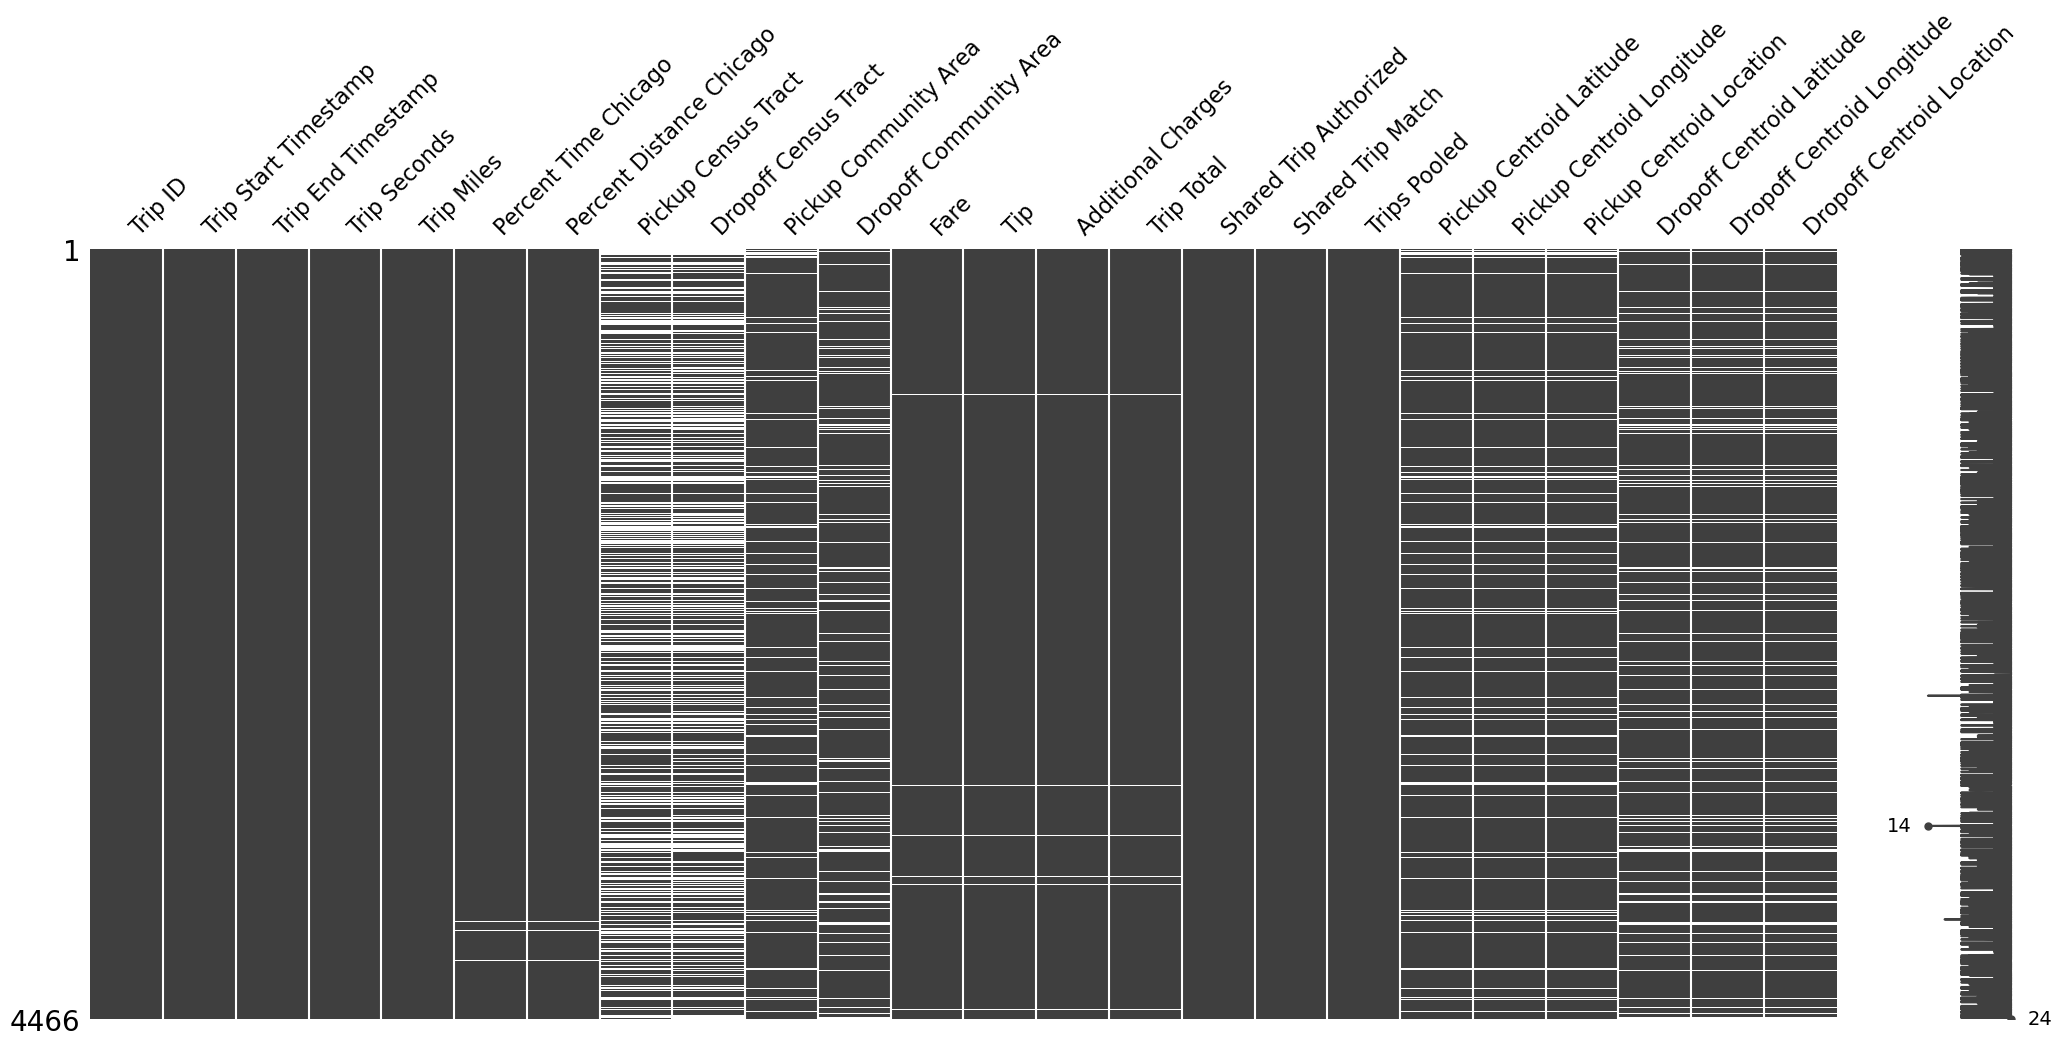

In [8]:
import missingno as msno
%matplotlib inline
msno.matrix(df_2023.sample(fraction=1/10000).toPandas())

In [9]:
#Approximate number of 2023 trips
from pyspark.sql.functions import approxCountDistinct

df_2023.select(approxCountDistinct("Trip ID", rsd = 0.01)).show()

23/11/22 17:55:49 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+------------------------------+
|approx_count_distinct(Trip ID)|
+------------------------------+
|                      44321903|
+------------------------------+



In [10]:
# number of observations with all the data in each column
df_2023.dropna(how='any').count()

24711974

In [11]:
# Working with just data that contains full information and check for dupes
df_2023 = df_2023.dropna(how='any', subset=['Trip Start Timestamp','Trip End Timestamp','Fare','Dropoff Community Area','Pickup Community Area'])
df_2023 = df_2023.dropDuplicates()
# df_2023.count()

In [12]:
df_2023 = df_2023.drop('Trips Pooled','Additional Charges','Shared Trip Authorized','Pickup Centroid Location','Dropoff Centroid Location')
df_2023 = df_2023.withColumnRenamed("Trip ID","ID").withColumnRenamed("Trip Start Timestamp","start_timestamp").withColumnRenamed("Trip End Timestamp","end_timestamp").withColumnRenamed("Trip Miles",\
                "miles").withColumnRenamed("Pickup Census Tract","pickup_tract").withColumnRenamed("Dropoff Census Tract","dropoff_tract").withColumnRenamed("Pickup Community Area","pickup_area"\
                ).withColumnRenamed("Dropoff Community Area","dropoff_area").withColumnRenamed("Trip Total","total").withColumnRenamed("Pickup Centroid Latitude","pickup_lat").withColumnRenamed(\
                "Pickup Centroid Longitude","pickup_lon").withColumnRenamed("Pickup Centroid Location","pickup_location").withColumnRenamed("Dropoff Centroid Latitude","dropoff_lat").withColumnRenamed(\
                "Dropoff Centroid Longitude","dropoff_lon").withColumnRenamed("Dropoff Centroid Location","dropoff_location").withColumnRenamed("Trip Seconds","seconds")
# fix datatypes
df_2023 = df_2023.withColumn('start_timestamp', F.to_timestamp(df_2023['start_timestamp'], 'MM/dd/yyyy hh:mm:ss a')).withColumn('end_timestamp', F.to_timestamp(df_2023['end_timestamp'], 'MM/dd/yyyy hh:mm:ss a'))
#df_weather = df_weather.withColumn('datetime',F.to_date(df_weather['datetime'], "yyyy-MM-dd"))


In [13]:
# add the month column
df_2023 = df_2023.withColumn('month', F.month(df_2023.start_timestamp))
df_2023 = df_2023.withColumn('day_of_month', F.dayofmonth(df_2023.start_timestamp))
df_2023 = df_2023.withColumn('hour', F.hour(df_2023.start_timestamp))
df_2023 = df_2023.withColumn('day', F.dayofweek(df_2023.start_timestamp))

In [14]:
sample_df = df_2023.sample(fraction=1/10000).toPandas().loc[:,["pickup_area","dropoff_area","total","Fare","Tip","total","miles","seconds","hour","day","month"]]

In [15]:
sample_df.head()

,pickup_area,dropoff_area,total,Fare,Tip,total,miles,seconds,hour,day,month
0,23,33,35.04,25.0,6,35.04,7.4,1099,11,6,9
1,8,8,14.07,10.0,0,14.07,1.6,586,14,6,9
2,8,8,11.16,5.0,2,11.16,1.1,440,10,3,1
3,1,24,26.48,17.5,5,26.48,8.5,1504,4,7,1
4,28,34,11.29,10.0,0,11.29,2.7,722,19,3,2


In [16]:
sample_df = sample_df.dropna()
sample_df = sample_df.drop_duplicates()

In [17]:
sample_df.head()
sample_df = sample_df.drop(columns='total')

In [18]:
#import seaborn as sns
#sns.set_theme(style="ticks")
#sns.pairplot(sample_df)
#plt.show()

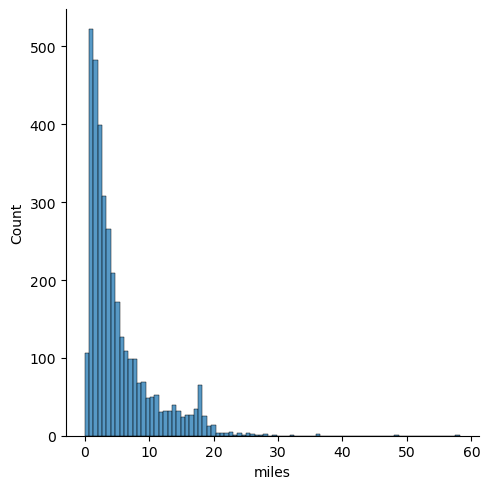

In [19]:
import seaborn as sns
sns.displot(sample_df, x="miles")

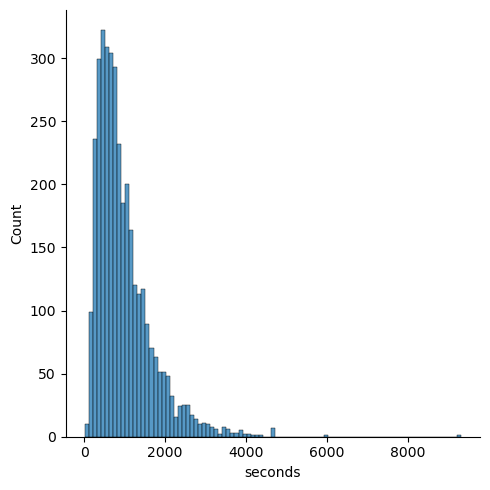

In [20]:
sns.displot(sample_df, x="seconds")

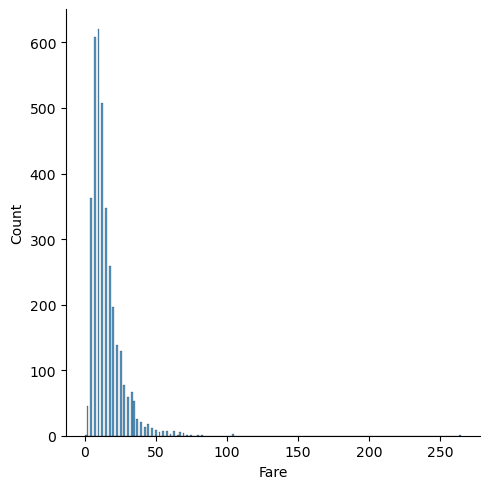

In [21]:
sns.displot(sample_df, x="Fare")

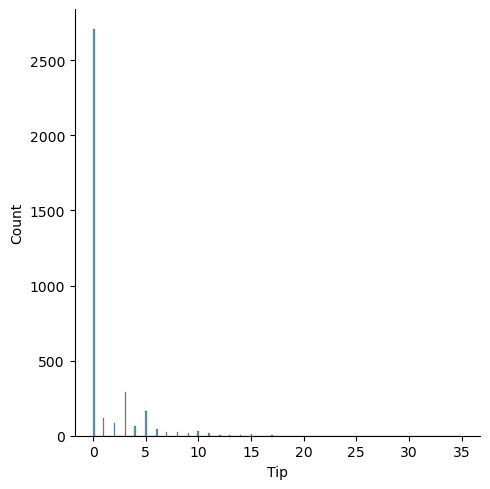

In [22]:
sns.displot(sample_df, x="Tip")

In [23]:
# get rides that occurred within hyde park
# add kenwood and woodlawn to this list - only if the other location is hyde park                    
df_hp = df_2023.filter((df_2023.pickup_area == 41) & (df_2023.dropoff_area == 41))
df_kw = df_2023.filter(((df_2023.pickup_area == 41) & (df_2023.dropoff_area == 42)) | ((df_2023.pickup_area == 42) & (df_2023.dropoff_area == 41)))
df_wl = df_2023.filter(((df_2023.pickup_area == 41) & (df_2023.dropoff_area == 39)) | ((df_2023.pickup_area == 39) & (df_2023.dropoff_area == 41)))
df_area = df_hp.union(df_kw).union(df_wl)

In [24]:
df_area.show(5)

+--------------------+-------------------+-------------------+-------+-----+--------------------+------------------------+------------+-------------+-----------+------------+----+---+-----+-----------------+-------------+--------------+-------------+--------------+-----+------------+----+---+
|                  ID|    start_timestamp|      end_timestamp|seconds|miles|Percent Time Chicago|Percent Distance Chicago|pickup_tract|dropoff_tract|pickup_area|dropoff_area|Fare|Tip|total|Shared Trip Match|   pickup_lat|    pickup_lon|  dropoff_lat|   dropoff_lon|month|day_of_month|hour|day|
+--------------------+-------------------+-------------------+-------+-----+--------------------+------------------------+------------+-------------+-----------+------------+----+---+-----+-----------------+-------------+--------------+-------------+--------------+-----+------------+----+---+
|93e3fca3d805c31c8...|2023-09-21 12:00:00|2023-09-21 12:00:00|    249|  0.9|                   1|                     

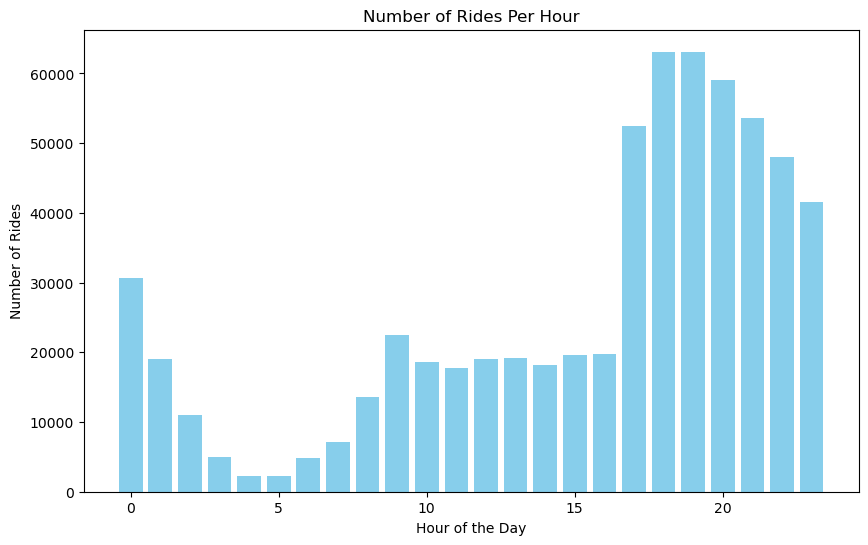

In [26]:
# rides per hour:
rides_per_hour = df_area.groupBy("hour").count().orderBy("hour")

# Convert the result to Pandas for local plotting
rides_per_hour_pd = rides_per_hour.toPandas()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(rides_per_hour_pd["hour"], rides_per_hour_pd["count"], color="skyblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Per Hour")
plt.show()

In [35]:
# when rides were 15.0 and 10 rides a month- till end June
df_area_program_till_end_June = df_area.filter((
    df_area.Fare <= 15.0) & ((df_area.hour >= 17) | (df_area.hour < 4)) & ((df_area.month <= 6)))

df_area_program_July_onwards = df_area.filter(
    (df_area.Fare <= 10.0) & ((df_area.hour >= 17) | (df_area.hour < 4)) & ((df_area.month > 6)))


df_area_program = df_area.filter((df_area.Fare <= 15.0) & ((df_area.hour >= 17) | (df_area.hour < 4)))

In [33]:
from pyspark.sql.functions import approxCountDistinct

df_area_program_till_end_June.select(approxCountDistinct("ID", rsd = 0.05)).show()

+-------------------------+
|approx_count_distinct(ID)|
+-------------------------+
|                   397041|
+-------------------------+



In [34]:
from pyspark.sql.functions import approxCountDistinct

df_area_program_July_onwards.select(approxCountDistinct("ID", rsd = 0.05)).show()

+-------------------------+
|approx_count_distinct(ID)|
+-------------------------+
|                    21256|
+-------------------------+



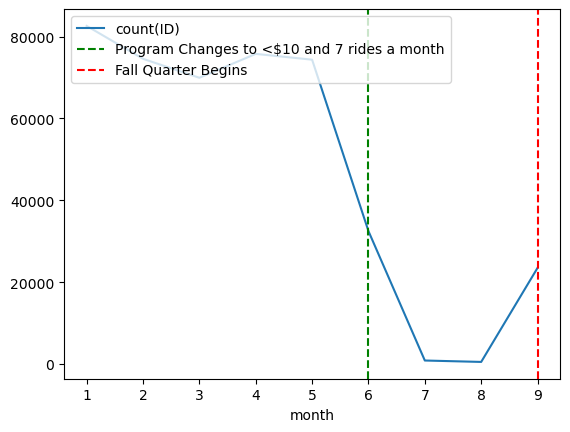

In [47]:
df_count_plot_program = df_area_program.groupby("month").agg({'ID':'count'}).orderBy(F.col('month').asc()).toPandas() #.plot(x="month",y="count(ID)")
ax = df_count_plot_program.plot(x="month", y="count(ID)")
ax.axvline(x=6, color='g', linestyle='--', label='Program Changes to <$10 and 7 rides a month')
ax.axvline(x=9, color='r', linestyle='--', label='Fall Quarter Begins')
plt.legend(loc='upper left')
plt.show()

When rides were 15.0 and 10 rides a month- till end June (pre-program change)

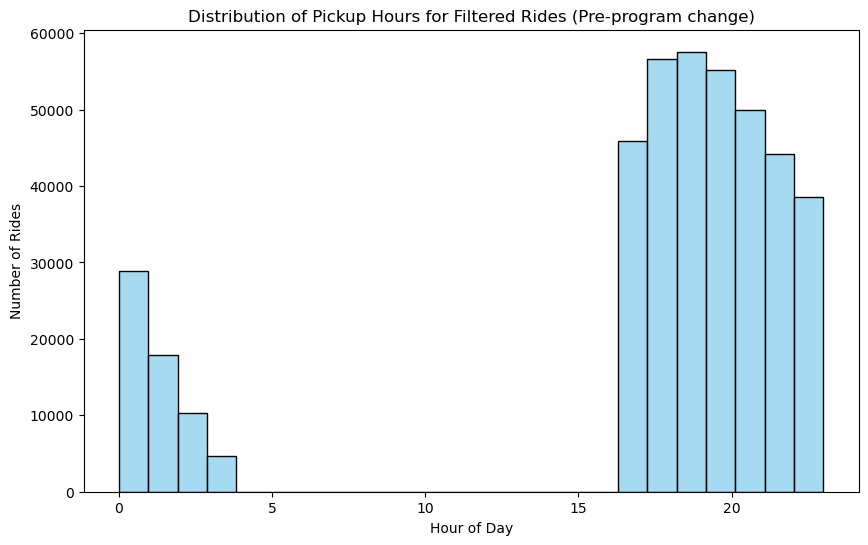

In [ ]:
import seaborn as sns

df_area_program_pd = df_area_program_till_end_June.toPandas()

plt.figure(figsize=(10, 6))
sns.histplot(df_area_program_pd['hour'], bins=24, kde=False, color='skyblue')
plt.title('Distribution of Pickup Hours for Filtered Rides (Pre-program change)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()

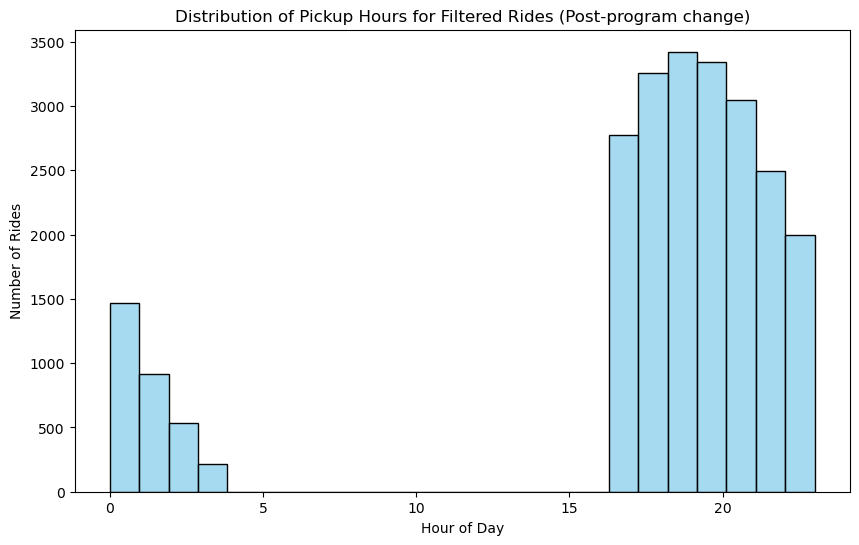

In [ ]:
import seaborn as sns

df_area_program_pd = df_area_program_July_onwards.toPandas()

plt.figure(figsize=(10, 6))
sns.histplot(df_area_program_pd['hour'], bins=24, kde=False, color='skyblue')
plt.title('Distribution of Pickup Hours for Filtered Rides (Post-program change)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()

<AxesSubplot:xlabel='month'>

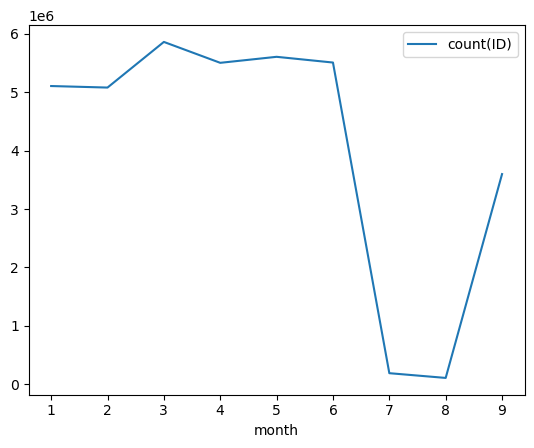

In [39]:
# basic plots for all rides (not just in the program area)
df_2023.groupby("month").agg({'ID':'count'}).orderBy(F.col('month').asc()).toPandas().plot(x="month",y="count(ID)")

In [ ]:
df_total = df_2023.groupby("pickup_area").agg({'ID':'count'}).orderBy(F.col('pickup_area').asc()).toPandas()

<Figure size 1000x1000 with 0 Axes>

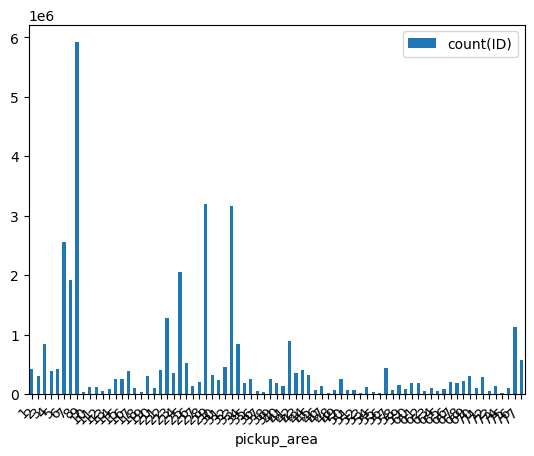

In [ ]:
%matplotlib inline
plt.figure(figsize=(10, 10))
ax = df_total.plot(x="pickup_area",y="count(ID)", kind='bar')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

<AxesSubplot:xlabel='dropoff_area'>

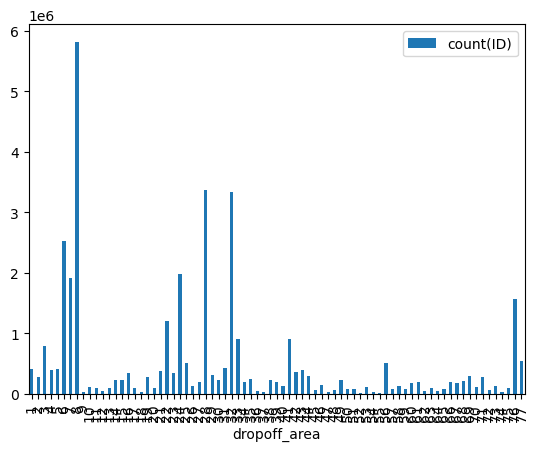

In [ ]:
df_2023.groupby("dropoff_area").agg({'ID':'count'}).orderBy(F.col('dropoff_area').asc()).toPandas().plot(x="dropoff_area",y="count(ID)", kind='bar')

In [49]:
# storing data on the bucket
df_area_program.write.option("header", "true").csv("gs://msca-bdp-student-gcs/bdp-rideshare-project/rideshare/processed_data/program_area_time_rides_2023.csv")
df_2023.write.option("header", "true").csv("gs://msca-bdp-student-gcs/bdp-rideshare-project/rideshare/processed_data/rides_2023.csv")